# Astrometric microlensing
During a microlensing event, the two images of the source are not resolvable. Is it possible to detect the expected shift of the center of light, though?

We have shown that during the microlensing event, the center of light, once removed the intrinsic motion of the source, shifts as:

$$
\delta(y)=\frac{\vec{y}}{y^2+2}
$$

Since $\vec{y}=((t-t_0)/t_E,y_0)$, if one choses the reference frame such as the $x$-axis is parallel to the direction of motion of the source, this shift has two components, one parallel and one perpendicular to the motion of the source:

$$
\delta(y)_{\parallel}=\frac{(t-t_0)/t_E}{y^2+2}
$$

and 

$$
\delta(y)_{\bot}=\frac{y_0}{y^2+2} \;.
$$

Considering that $y(t)=\sqrt{y_0^2+(t-t_0)^2/t_E^2}$, we have all the ingredients to investivate what kind of geometrical figure is traced by the center of light (corrected for the intrinsic motion of the source!).

## Some classes to deal with lenses and sources

In the following, we build some classes to deal with the point mass lens and its source.

(-1.8, 2.2)

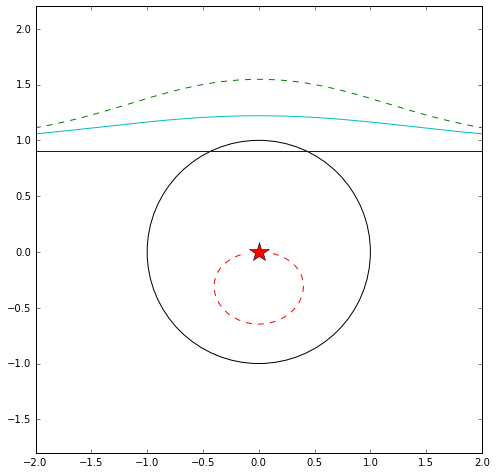

In [9]:
import numpy as np
from astropy import constants as const
from astropy import units as u
import matplotlib.pyplot as plt

# this class deals with the source in the microlensing event
class point_source(object):
    
    def __init__(self,flux=1.0,ds=10.0,vel=200.):
        self.ds=ds
        self.flux=flux
        self.vel=vel
        
# this class deals with the lens. It requires a point source to be 
# provided in order to build the point lens
class point_lens(object):

    # the constructor of the microlens
    def __init__(self,ps,mass=1.0,dl=5.0,ds=8.0,t0=0.0,y0=0.1):
        self.M=mass
        self.dl=dl
        self.ps=ps
        self.y0=y0
        self.t0=t0
        self.tE=self.EinsteinCrossTime()
    
    # a function returning the Einstein radius
    def EinsteinRadius(self):
        mass=self.M*const.M_sun
        G=const.G
        c=c=const.c
        aconv=180.0*3600.0/np.pi*u.arcsecond
        return((np.sqrt(4.0*(G*mass/c/c).to('kpc')*(self.ps.ds-self.dl)
                        /self.dl/self.ps.ds/u.kpc))*aconv)
    
    # a function retruning the Einstein radius crossing time
    def EinsteinCrossTime(self):
        theta_e=self.EinsteinRadius()
        return(((theta_e.to('radian').value*self.dl*u.kpc).to('km')
                /self.ps.vel/u.km*u.s).to('day'))
    
    # a function returning the coordinates of the unlensed source 
    # at time t
    def y(self,t):
        y1=(t-self.t0)/self.tE.value
        y2=np.ones(len(t))*self.y0
        return(y1,y2)
    
    # a function returning the coordinates of the x_+ image at time t
    def xp(self,t):
        y1, y2  = self.y(t)
        Q = np.sqrt(y1**2 + y2**2 +4)/(np.sqrt(y1**2 + y2**2))
        xp1= 0.5 *(1 + Q)* y1
        xp2= 0.5 *(1 + Q)* y2
        return(xp1, xp2)
    
    # a function retruning the coordinates of the x_- image at time t
    def xm(self,t):
        y1, y2  = self.y(t)
        Q = np.sqrt(y1**2 + y2**2 +4)/(np.sqrt(y1**2 + y2**2))
        xm1= 0.5 *(1 - Q)* y1
        xm2= 0.5 *(1 - Q)* y2
        return(xm1, xm2)
    
    # the magnification of the x_+ image
    def mup(self,t):
        y1, y2  = self.y(t)
        yy=np.sqrt(y1**2+y2**2)
        mup=0.5*(1+(yy**2+2)/yy/np.sqrt(yy**2+4))
        return (mup)
    
    # the magnification of the x_- image
    def mum(self,t):
        y1, y2  = self.y(t)
        yy=np.sqrt(y1**2+y2**2)
        mum=0.5*(1-(yy**2+2)/yy/np.sqrt(yy**2+4))
        return (mum)
    
    # a function retruning the coordinate of the light centroid
    def xc(self,t):
        xp=self.xp(t)
        xm=self.xm(t)
        xc=(xp*np.abs(self.mup(t))+xm*np.abs(self.mum(t)))/(np.abs(self.mup(t))+np.abs(self.mum(t)))
        return (xc)
    
    ################################################################################################
    def xp_ext_source(self,t,r):
        phi=np.linspace(0.0,2*np.pi,360)
        dy1=r*np.cos(phi)
        dy2=r*np.sin(phi)
        y1,y2=self.y(t)
        yy1=y1+dy1
        yy2=y2+dy2
        Q=np.sqrt(yy1**2+yy2**2+4.0)/np.sqrt(yy1**2+yy2**2)
        xp1=0.5*(1+Q)*yy1
        xp2=0.5*(1+Q)*yy2
        return(xp1,xp2)   
    
    def xm_ext_source(self,t,r):
        phi=np.linspace(0.0,2*np.pi,360)
        dy1=r*np.cos(phi)
        dy2=r*np.sin(phi)
        y1,y2=self.y(t)
        yy1=y1+dy1
        yy2=y2+dy2
        Q=np.sqrt(yy1**2+yy2**2+4.0)/np.sqrt(yy1**2+yy2**2)
        xm1=0.5*(1-Q)*yy1
        xm2=0.5*(1-Q)*yy2
        return(xm1,xm2)
    
    def deltaxc(self,t):
        y1,y2=self.y(t)
        yy=(y1**2+y2**2)
        return(y1/(yy+2),y2/(yy+2))
    
    
t = np.linspace(-300,300,2000)
ps = point_source()
pl = point_lens(ps=ps, mass=1.0, dl=5.0, y0 = 0.9)
y1, y2 = pl.y(t)
xp1, xp2= pl.xp(t)
xm1,xm2=pl.xm(t)
xc1,xc2=pl.xc(t)

%matplotlib inline
fig, ax=plt.subplots(1,1,figsize=(8,8))
ax.plot(y1, y2)
ax.plot(xp1, xp2, '--')
ax.plot(xm1, xm2, '--')
ax.plot(xc1,xc2, '-')

ax.plot([0],[0],'*',markersize=20, color='red')
circle=plt.Circle((0,0),1,color='black',fill=False)
ax.add_artist(circle)
ax.set_xlim([-2,2])
ax.set_ylim([-1.8,2.2])


Now, we can add some extra feature in the figure. For example, we can better understand why the light centroid moves as shown above if we give a visual impression of the image magnifications as a function of time.

To do that we add another couple of functions to the class above:

In [ ]:
    def xp_ext_source(self,t,r):
        phi=np.linspace(0.0,2*np.pi,360)
        dy1=r*np.cos(phi)
        dy2=r*np.sin(phi)
        y1,y2=self.y(t)
        yy1=y1+dy1
        yy2=y2+dy2
        Q=np.sqrt(yy1**2+yy2**2+4.0)/np.sqrt(yy1**2+yy2**2)
        xp1=0.5*(1+Q)*yy1
        xp2=0.5*(1+Q)*yy2
        return(xp1,xp2)   
    
    def xm_ext_source(self,t,r):
        phi=np.linspace(0.0,2*np.pi,360)
        dy1=r*np.cos(phi)
        dy2=r*np.sin(phi)
        y1,y2=self.y(t)
        yy1=y1+dy1
        yy2=y2+dy2
        Q=np.sqrt(yy1**2+yy2**2+4.0)/np.sqrt(yy1**2+yy2**2)
        xm1=0.5*(1-Q)*yy1
        xm2=0.5*(1-Q)*yy2
        return(xm1,xm2)

These two functions perform the following operation. Let assume that the source is a circle with radius $r$ at position $\vec y$. Then, the source can be seen as a collection of point sources at positions
$$
\vec y+d\vec y_i
$$
where 
$$
d\vec{y}_i=r(\cos \phi,\sin \phi)
$$
with $\phi \in [0,2\pi]$.
Each of these point sources produce two images $\vec x_{i,+}$ and $\vec x_{i,-}$, which can be found using the functions defined earlier. By doing this fo all points on the perimeter of the source, we obtain the lensed contours of the two images.

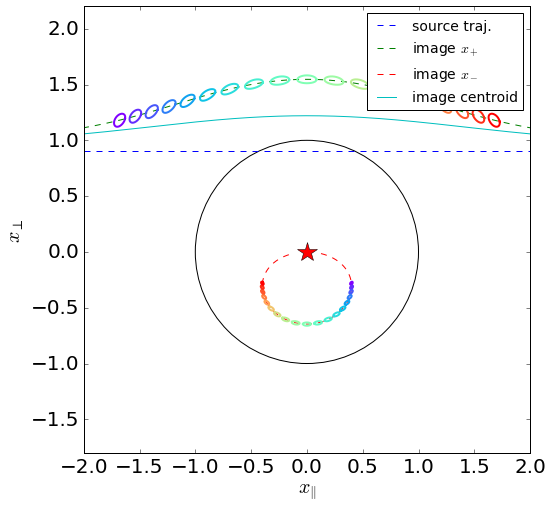

In [10]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.plot(y1,y2,'--',label='source traj.')
ax.plot(xp1,xp2,'--',label='image $x_+$')
ax.plot(xm1,xm2,'--',label='image $x_-$')
ax.plot(xc1,xc2,label='image centroid')


t_sparse=np.linspace(-50,50,19)
from matplotlib.pyplot import cm 
color=iter(cm.rainbow(np.linspace(0,1,t_sparse.size)))
for tt in t_sparse:
    c=next(color)
    xp1_e,xp2_e=pl.xp_ext_source(np.array([tt]),0.05)
    ax.plot(xp1_e,xp2_e,color=c,lw=2)
    xm1_e,xm2_e=pl.xm_ext_source(np.array([tt]),0.05)
    ax.plot(xm1_e,xm2_e,color=c,lw=2)
    
ax.set_xlim([-2,2])
ax.set_ylim([-1.8,2.2])
ax.plot([0.0],[0.0],'*',markersize=20,color='red')
circle=plt.Circle((0,0),1,color='black',fill=False)
ax.add_artist(circle)
ax.legend(fontsize=14)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel(r'$x_\|$',fontsize=20)
ax.set_ylabel(r'$x_\perp$',fontsize=20)



Now, imagine that you are monitoring a source over time. The source is fixed on the sky and at some time a microlensing event starts. What we would measure is a shift of the source compared to its intrinsic position. Therefore, we would measure the quantity
$$
\delta x_c=\vec x_c-\vec y \;.
$$
What kind of trajectory would this shift give rise to?

First, we add this function to the class:

In [ ]:
    def deltaxc(self,t):
        y1,y2=self.y(t)
        yy=(y1**2+y2**2)
        return(y1/(yy+2),y2/(yy+2))

Then, we can use it to compute the coordinates of the centroid shift:

(-0.0004, 0.0004)

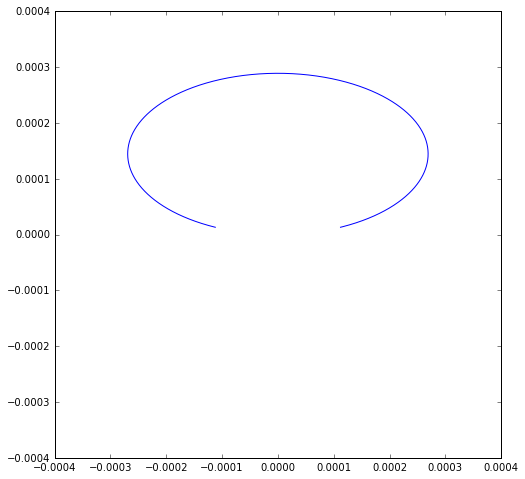

In [11]:
dxc1,dxc2=pl.deltaxc(t)
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.plot(dxc1*pl.EinsteinRadius(),dxc2*pl.EinsteinRadius())
ax.set_xlim([-0.0004,0.0004])
ax.set_ylim([-0.0004,0.0004])
